In [1]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pygmt

Source of the magnetic global grid: https://www.ncei.noaa.gov/products/earth-magnetic-model-anomaly-grid-2

EMAG2v3 Source GeoTIFFs: Upward Continued

In [2]:
data_dir = Path("..") / "data"
mag_fname = data_dir / "magnetic-anomaly.nc"

In [3]:
mag = xr.load_dataarray(mag_fname)
mag

<xarray.DataArray (latitude: 1350, longitude: 2700)>
array([[-99.178406, -99.1573  , -99.1362  , ..., -99.24888 , -99.22528 ,
        -99.2017  ],
       [-94.359566, -94.19722 , -94.03495 , ..., -94.759094, -94.627144,
        -94.49527 ],
       [-90.07583 , -89.80474 , -89.533806, ..., -90.739624, -90.52039 ,
        -90.301346],
       ...,
       [-66.69842 , -65.286156, -67.73091 , ..., -86.63556 , -64.753975,
        -65.48987 ],
       [-49.445766, -49.896606, -50.10876 , ..., -79.2625  , -50.05035 ,
        -49.741955],
       [-34.207455, -35.07814 , -44.76409 , ..., -70.8843  , -35.632275,
        -34.775425]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 0.0 0.1333 0.2667 0.4 ... 359.6 359.7 359.9
  * latitude   (latitude) float64 89.97 89.83 89.7 89.57 ... -89.63 -89.77 -89.9
Attributes:
    grid_mapping:  spatial_ref

grdinfo [WARNING]: Guessing of registration in conflict between x and y, using gridline


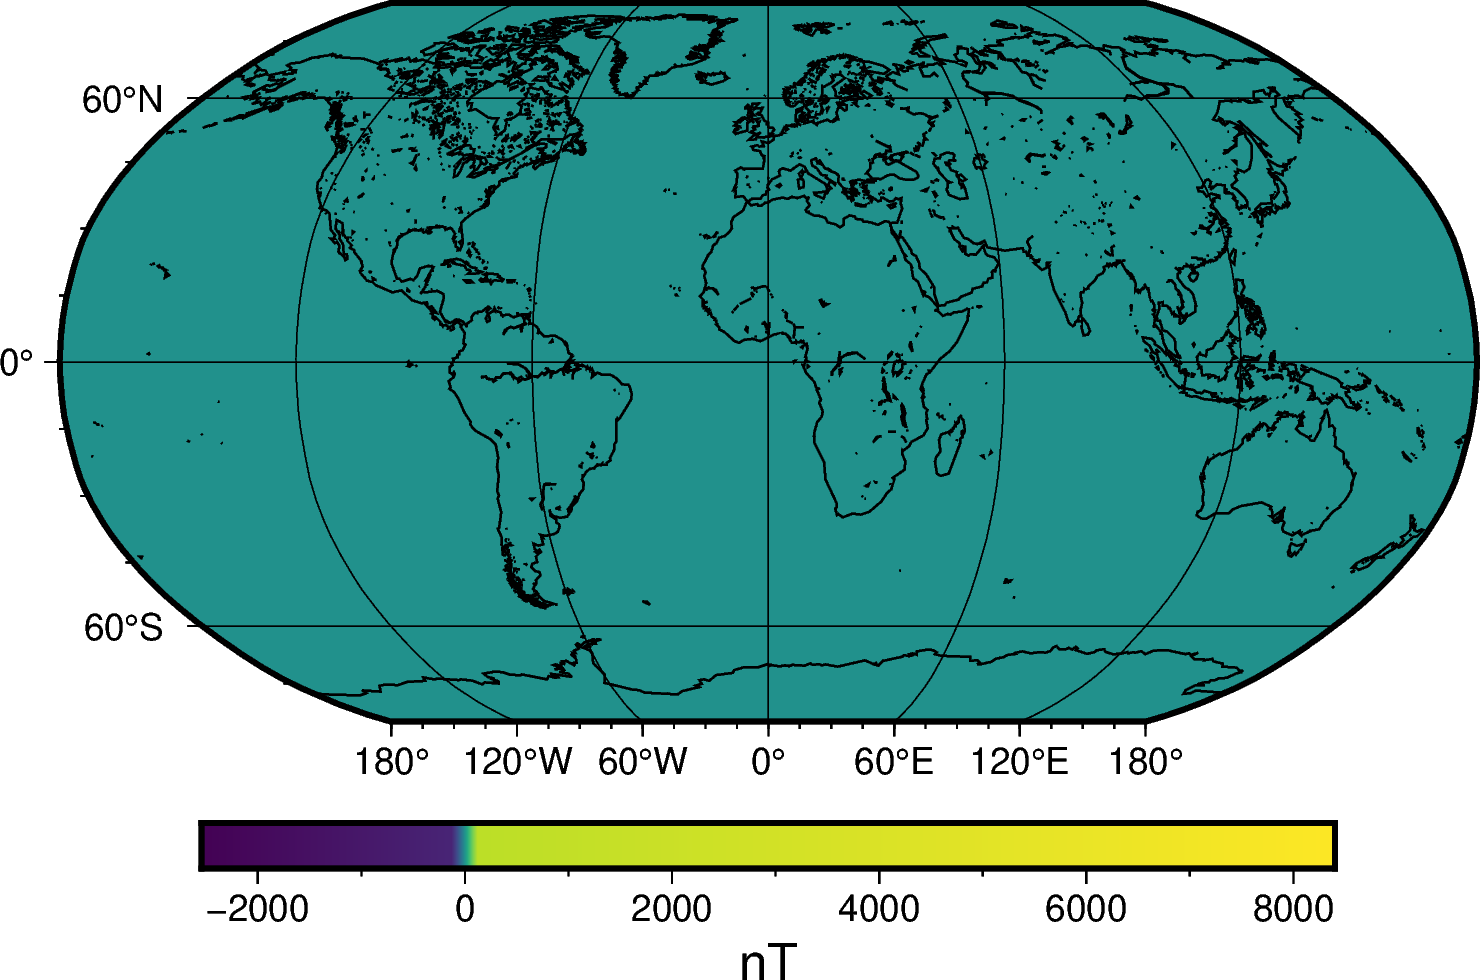

In [4]:
# Make a plot of data using PyGMT
gmt_projection = "N12c"
fig = pygmt.Figure()

pygmt.grd2cpt(grid=mag, cmap="viridis", continuous=True)

with pygmt.config(FONT_TITLE="14p"):
    fig.grdimage(
        grid=mag,
        region="d",
        projection=gmt_projection,
        frame="afg",
        # shading="+a45+n70",
        cmap=True,
        nan_transparent=True,
    )

fig.coast(shorelines="0.5p,black", resolution="crude")

fig.colorbar(cmap=True, frame=["af", "x+lnT"])

fig.show()

makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


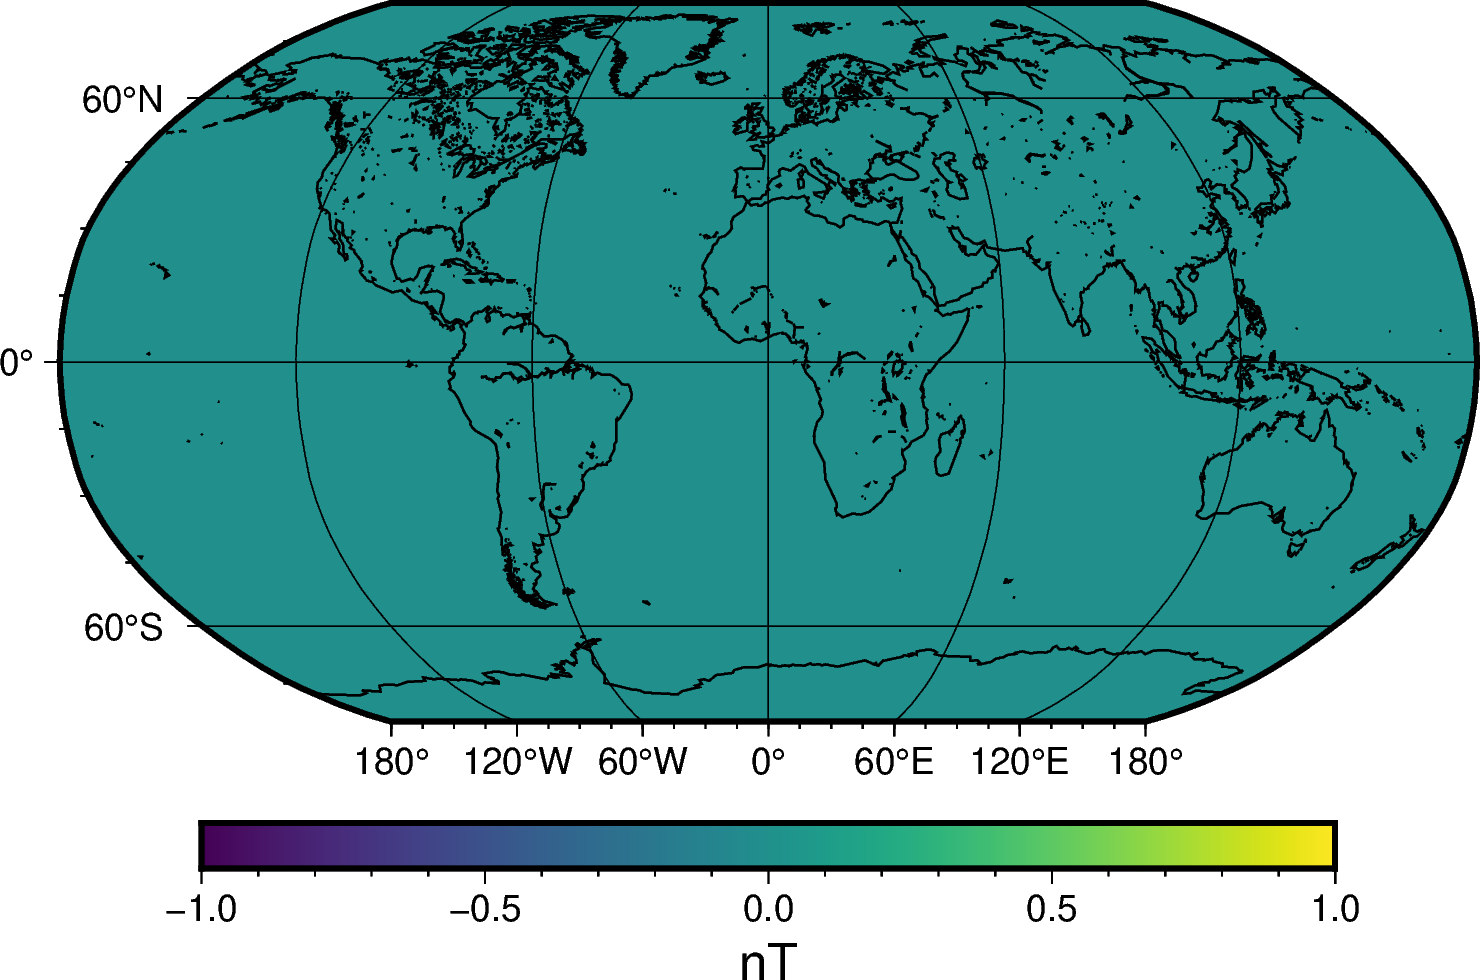

In [23]:
# Make a plot of data using PyGMT
gmt_projection = "N12c"
fig = pygmt.Figure()

maxabs = 1
pygmt.makecpt(cmap="viridis", series=[-maxabs, maxabs], continuous=True)

title = "Gravity disturbance of the Earth"

with pygmt.config(FONT_TITLE="14p"):
    fig.grdimage(
        mag,
        region="d",
        projection=gmt_projection,
        frame="afg",
        # shading="+a45+n70",
        cmap=True,
        nan_transparent=True,
    )

fig.coast(shorelines="0.5p,black", resolution="crude")

fig.colorbar(cmap=True, frame=["af", "x+lnT"])

fig.show()